In [1]:
import pandas as pd
import numpy as np

In [2]:
headlines = pd.read_csv('../data/processed/headlines_cl_sent_pol_rapi.csv')

In [4]:
# count the number of headlines per year
headlines['count'] = 1
headlines['year'] = pd.to_datetime(headlines['time']).dt.year
headlines_counts = headlines.groupby(["country", "year"], as_index=False).sum()[["country", "year", 'count']]

In [5]:
headlines.drop_duplicates(subset = ['clean_hl_words'], inplace = True)

In [6]:
countries_freq = pd.read_csv('../data/processed/countries_freq_rapi.csv')

In [7]:
countries_freq

,Unnamed: 0,word,frequency,country
0,0,man,1041,South Africa
1,1,sa,887,South Africa
2,2,watch,864,South Africa
3,3,kill,851,South Africa
4,4,year,851,South Africa
...,...,...,...,...
126901,34382,abedin,1,India
126902,34383,awkwardly,1,India
126903,34384,mehrotras,1,India
126904,34385,pvc,1,India


In [8]:
headlines['time']= headlines.time.str.split('+', expand=True)[0]

In [9]:
df = headlines[['clean_hl_words', 'country', 'time']]

In [10]:
from datetime import datetime
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df['clean_hl_words'] = df['clean_hl_words'].str.replace('{', '')
df['clean_hl_words'] = df['clean_hl_words'].str.replace('}', '')
df['clean_hl_words'] = df['clean_hl_words'].str.replace(" '", '')
df['clean_hl_words'] = df['clean_hl_words'].str.replace('~', '')
df['clean_hl_words'] = df['clean_hl_words'].str.replace('|', '')
df['clean_hl_words'] = df['clean_hl_words'].str.replace("'", '')
df['clean_hl_words'] = df['clean_hl_words'].str.replace('"', '')

df['clean_hl_words'] = df['clean_hl_words'].str.split(",")

In [16]:
%%time
freq = df.set_index('time').groupby([pd.Grouper(freq = 'Y'), 'country']).sum()

Wall time: 3min 15s


In [17]:
df['year']= df['time'].dt.year

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
# df.groupby(['year', 'country']).sum()

In [2]:
df.set_index('time').groupby([pd.Grouper(freq = 'Y'), 'country']).sum()

In [20]:
freq

clean_hl_words
time       country                                                        
2005-12-31 India         [rudolph, not, aug, monster, son, dec, join, g...
           South Africa                             [monroe, stand, night]
           UK            [parent, kill, call, accuse, motel, kill, man,...
           USA           [iowa, snatch, find, dead, look, shasta, futur...
2006-12-31 India         [jonbenet, jun, die, ramsey, patsy, tourist, b...
...                                                                    ...
2020-12-31 USA           [batter, chicago, drive, young, line, break, c...
2021-12-31 India         [role, indu, jain, world, aspire, man, leader,...
           South Africa  [say, world, pregnancy, reinhart, bank, fire, ...
           UK            [tell, kindness, move, elderly, tills, man, sh...
           USA           [honesty, policy, sale, scout, make, cookie, s...

[66 rows x 1 columns]

In [22]:
print("There is " ,len(freq.reset_index()['time'].unique()), "year of data")

There is  17 year of data


In [23]:
freq = freq.reset_index()

In [24]:
freq

,time,country,clean_hl_words
0,2005-12-31,India,"[rudolph, not, aug, monster, son, dec, join, g..."
1,2005-12-31,South Africa,"[monroe, stand, night]"
2,2005-12-31,UK,"[parent, kill, call, accuse, motel, kill, man,..."
3,2005-12-31,USA,"[iowa, snatch, find, dead, look, shasta, futur..."
4,2006-12-31,India,"[jonbenet, jun, die, ramsey, patsy, tourist, b..."
...,...,...,...
61,2020-12-31,USA,"[batter, chicago, drive, young, line, break, c..."
62,2021-12-31,India,"[role, indu, jain, world, aspire, man, leader,..."
63,2021-12-31,South Africa,"[say, world, pregnancy, reinhart, bank, fire, ..."
64,2021-12-31,UK,"[tell, kindness, move, elderly, tills, man, sh..."


In [25]:
import collections
freq['clean_hl_words'] = freq['clean_hl_words'].apply(lambda x: collections.Counter(x))

In [ ]:
def prop(list):
    

In [85]:
test = [1,1,1,0]
a = collections.Counter(test)


dict_values([3, 1])

In [26]:
freq

,time,country,clean_hl_words
0,2005-12-31,India,"{'rudolph': 2, 'not': 3, 'aug': 2, 'monster': ..."
1,2005-12-31,South Africa,"{'monroe': 1, 'stand': 1, 'night': 1}"
2,2005-12-31,UK,"{'parent': 1, 'kill': 4, 'call': 1, 'accuse': ..."
3,2005-12-31,USA,"{'iowa': 1, 'snatch': 1, 'find': 6, 'dead': 2,..."
4,2006-12-31,India,"{'jonbenet': 1, 'jun': 1, 'die': 2, 'ramsey': ..."
...,...,...,...
61,2020-12-31,USA,"{'batter': 2, 'chicago': 80, 'drive': 50, 'you..."
62,2021-12-31,India,"{'role': 63, 'indu': 6, 'jain': 8, 'world': 15..."
63,2021-12-31,South Africa,"{'say': 119, 'world': 24, 'pregnancy': 3, 'rei..."
64,2021-12-31,UK,"{'tell': 206, 'kindness': 8, 'move': 26, 'elde..."


In [27]:
def get_proportional_frequency(dict):
    return {k: 100*(v/ sum([v for k,v in dict.items()])) for k,v in dict.items()}

In [28]:
freq['clean_hl_words_prop']= freq['clean_hl_words'].apply(lambda x: get_proportional_frequency(x))

In [46]:
import json
df2 = freq.join(freq.clean_hl_words.apply(pd.Series), how = 'left', lsuffix='_left', rsuffix='_right').melt(id_vars=['time_left', 'country_left', 'clean_hl_words', 'clean_hl_words_prop'])

In [44]:
# freq.join(freq.clean_hl_words_prop.apply(pd.Series), how = 'left', lsuffix='_left', rsuffix='_right')

In [48]:
df2

,time_left,country_left,clean_hl_words,clean_hl_words_prop,variable,value
0,2005-12-31,India,"{'rudolph': 2, 'not': 3, 'aug': 2, 'monster': ...","{'rudolph': 0.44742729306487694, 'not': 0.6711...",rudolph,2.0
1,2005-12-31,South Africa,"{'monroe': 1, 'stand': 1, 'night': 1}","{'monroe': 33.33333333333333, 'stand': 33.3333...",rudolph,NaN
2,2005-12-31,UK,"{'parent': 1, 'kill': 4, 'call': 1, 'accuse': ...","{'parent': 1.5151515151515151, 'kill': 6.06060...",rudolph,NaN
3,2005-12-31,USA,"{'iowa': 1, 'snatch': 1, 'find': 6, 'dead': 2,...","{'iowa': 0.1697792869269949, 'snatch': 0.16977...",rudolph,NaN
4,2006-12-31,India,"{'jonbenet': 1, 'jun': 1, 'die': 2, 'ramsey': ...","{'jonbenet': 0.1893939393939394, 'jun': 0.1893...",rudolph,NaN
...,...,...,...,...,...,...
4996459,2020-12-31,USA,"{'batter': 2, 'chicago': 80, 'drive': 50, 'you...","{'batter': 0.002038569739470787, 'chicago': 0....",earthly,NaN
4996460,2021-12-31,India,"{'role': 63, 'indu': 6, 'jain': 8, 'world': 15...","{'role': 0.07577944572748269, 'indu': 0.007217...",earthly,NaN
4996461,2021-12-31,South Africa,"{'say': 119, 'world': 24, 'pregnancy': 3, 'rei...","{'say': 0.7469244288224955, 'world': 0.1506402...",earthly,NaN
4996462,2021-12-31,UK,"{'tell': 206, 'kindness': 8, 'move': 26, 'elde...","{'tell': 0.3177296213464949, 'kindness': 0.012...",earthly,NaN


In [49]:
df2.drop(columns = ['clean_hl_words', 'clean_hl_words_prop'], inplace = True)

In [52]:
df2

,time_left,country_left,variable,value
0,2005-12-31,India,rudolph,2.0
1,2005-12-31,South Africa,rudolph,NaN
2,2005-12-31,UK,rudolph,NaN
3,2005-12-31,USA,rudolph,NaN
4,2006-12-31,India,rudolph,NaN
...,...,...,...,...
4996459,2020-12-31,USA,earthly,NaN
4996460,2021-12-31,India,earthly,NaN
4996461,2021-12-31,South Africa,earthly,NaN
4996462,2021-12-31,UK,earthly,NaN


In [53]:
df2.columns = ['time', 'country', 'word', 'frequency']

In [54]:
df2['word'] = df2['word'].str.strip("'").str.strip("'")
#df['word'] 

In [57]:
df = df.merge(df2, on = ['time', 'country', 'word'])

In [22]:
df.drop(columns = ['clean_hl_words'], inplace = True)

In [175]:
df.drop(columns = ['clean_hl_words', 'clean_hl_freq'], inplace = True)

In [64]:
df['word'] = df['word'].str.strip("'").str.strip("'")
df['word'] 

In [61]:
df2.to_csv('../data/processed/country_time_freq_rapi_raw.csv')

In [2]:
import pandas as pd

In [71]:
# df = pd.read_csv('../data/processed/country_time_freq_rapi_raw.csv')
df2['year'] = pd.to_datetime(df2.time).dt.year

In [73]:
df = pd.merge(df2, headlines_counts, on = ['year', 'country'])

# TODO: REMOVE THOSE CHARACTERS BEFORE THE TEMPORAL CALCULATIONS
# df['word'] = df['word'].str.strip(" '")
# df['word'] = df['word'].str.strip("~")
# df['word'] = df['word'].str.strip("|")
# df['word'] = df['word'].str.strip("\\")
# df['word'] = df['word'].str.strip("'")
# df['word'] = df['word'].str.strip('"')

df = df.groupby(['country', 'word', 'year'], as_index=False).sum()[['year', 'country', 'word', 'frequency', 'count']]
df['freq_prop_headlines'] = df['frequency']/df['count']
df['word_len'] = df['word'].apply(lambda x: len(x))
df = df[df['word_len']>2]

In [75]:
# find 100 most frequent words for each country
freq_words =[]
for country in df['country'].unique():
    words = list(df[df['country']=="USA"].groupby("word", as_index=False).sum().sort_values("frequency", ascending=False).head(200)["word"].unique())
    freq_words.extend(words)
    
df_freq = df[df['word'].isin(freq_words)]


In [77]:
# df_freq

In [81]:
df_freq.to_csv('../data/processed/country_time_freq_rapi.csv')

In [2]:
df_freq = pd.read_csv('../data/processed/country_time_freq_rapi.csv')

In [7]:
# countries_freq = pd.read_csv('../data/processed/countries_freq_rapi.csv')

In [9]:
# countries_freq.sort_values(by='frequency', ascending = False).head(20)

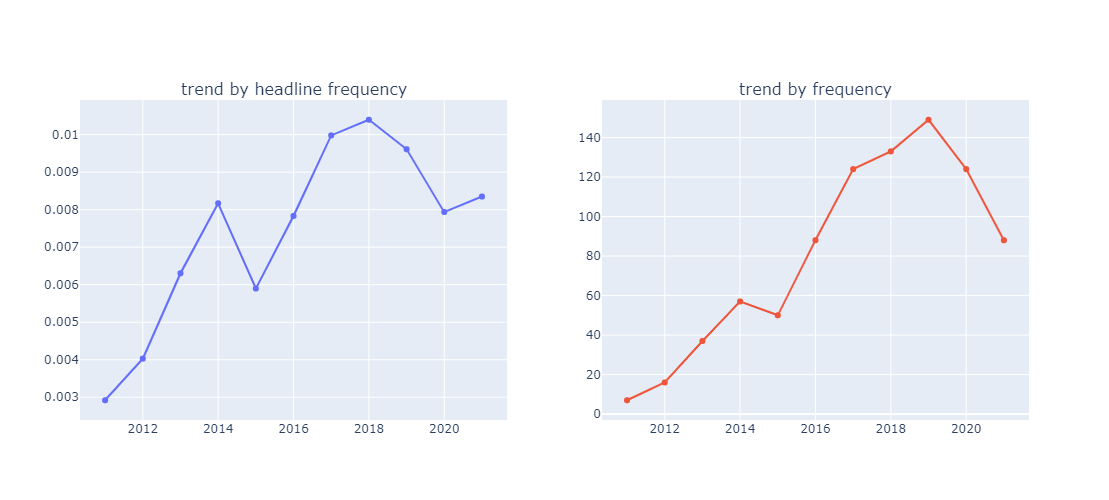

In [80]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

word = 'abuse'
country = 'UK'

fig = make_subplots(rows = 1, cols = 2, subplot_titles=("trend by headline frequency", "trend by frequency"))

df1 = df_freq[(df_freq['word']== word) & (df_freq['country']==country)]
df1 = df1[(df1['year']>2010)]

fig.add_trace(go.Scatter( x = df1['year'], y=df1['freq_prop_headlines']), row=1, col=1 )
fig.add_trace(go.Scatter( x = df1['year'], y=df1['frequency']), row=1, col=2 )

fig.update_layout(height = 500, width = 800, showlegend = False)

#fig = px.line(df1.sort_values(by = 'time', ascending = False), x = 'time', y ='prop_frequency')
fig.show()

In [82]:
# rank each word in each country according to the percent change from 2010 to 2019
df_freq_long = df_freq.pivot_table('frequency',  ['country', 'word'], 'year').reset_index()
df_hfreq_long = df_freq.pivot_table('freq_prop_headlines',  ['country', 'word'], 'year').reset_index()

df_freq_long['freq_delta'] = (df_freq_long[2021] - (0.00001 + df_freq_long[2010]))/(0.00001 + df_freq_long[2010])
df_hfreq_long['freq_prop_delta'] = (df_hfreq_long[2021] - (0.00001 + df_hfreq_long[2010]))/(0.00001 + df_hfreq_long[2010])
# df_freq_long['freq_delta'] = (df_freq_long[2019] - df_freq_long[2010])/df_freq_long[2010]
# df_hfreq_long['freq_prop_delta'] = (df_hfreq_long[2019] - df_hfreq_long[2010])/df_hfreq_long[2010]

df_freq_long = df_freq_long.sort_values(["country", "freq_delta"], ascending=False)
df_freq_long['freq_rank'] = np.NaN

df_hfreq_long = df_hfreq_long.sort_values(["country", "freq_prop_delta"], ascending=False)
df_hfreq_long['hfreq_rank'] = np.NaN

for country in df_freq_long['country'].unique():
    df_freq_long['freq_rank'][df_freq_long['country']==country] = np.arange(1,len(df_freq_long[df_freq_long['country']==country])+1)
    df_hfreq_long['hfreq_rank'][df_hfreq_long['country']==country] = np.arange(1,len(df_hfreq_long[df_hfreq_long['country']==country])+1)

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
# df_freq_long[['word', 'freq_rank']].tail(20)

In [74]:
# df_hfreq_long[['word', 'hfreq_rank']].tail(20)

In [83]:
from functools import reduce

dfs = [df_freq, df_freq_long[['country', 'word', 'freq_rank']], df_hfreq_long[['country', 'word', 'hfreq_rank']]]
# df_hfreq_long[df_hfreq_long['country']=="UK"]

In [85]:
df_freq_rank = reduce(lambda  left,right: pd.merge(left,right,on=['country', 'word'],
                                            how='inner'), dfs).sort_values(['country', 'freq_rank'])

In [87]:
df_freq_rank.to_csv('../data/processed/country_time_freqrank_rapi.csv')